# Video Game and Video Game Platform Analysis by Region

In this analysis, were going to take a data set and were going to analyze the different platforms and different regions that video games are sold. Were going to analyze what is the most popular console and how often does a console begin to fade. Also, were going to see what types of games are the most popular by genre and if the critic score and ESRB rating affect the sale of these games throughout the region.

## Importing all the necessary Libraries needed and reading our DataFrame

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import os
from datetime import datetime as dt
import seaborn as sns

In [3]:
df = pd.read_csv("/datasets/games.csv")

#### Converting all of our columns to lowercase

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df = df.rename( columns= {
    'Name': "name",
    'Platform': "platform",
    'Year_of_Release': "year_of_release",
    'Genre': "genre",
    'NA_sales': "na_sales",
    'EU_sales':"eu_sales",
    'JP_sales':"jp_sales",
    'Other_sales':"other_sales",
    'Critic_Score':"critic_score",
    'User_Score': "user_score",
    'Rating': "rating"
})

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Checking our dataframe data types

In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Converting the Column of "year_of_release" to a Datetime type.

In [7]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


### Checking for Duplicates in the Data Frame

In the cells below, we checked the dataframe to see if there were any duplicated values, and it turns out, there is 0 duplicated values.

In [8]:
df.duplicated().sum()

0

In [9]:
duplicates = df.duplicated(subset=['name', 'year_of_release', "platform"], keep='first')

print(df[["name", "year_of_release", "platform"]].duplicated().sum())

duplicate_rows = df[duplicates]

display(duplicate_rows)



2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993-01-01,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


After dropping the rest of the duplicates extracted by the [["name", "platform", "year_of release"]], we are left with two duplicates that werent deleted, these werent deleted because what changes is the sales by region. On the madden game, the "eu_sales" on the duplicate is only 0.01, it wasnt deleted because it differes from the other eu_sales, the other is 0.22 and it also differes from the "other sales" column. The other row wasnt deleted because the name, year of release and platform are the same but we have very little information to know if its the same game or a different one because the sales differ.

In [10]:
df[(df["name"] == "Madden NFL 13") & (df["platform"] == "PS3")]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


### Converting our missing values to None and converting to Float Data Types

In the cell below, we changed the "tbd" value to None or NaN so we can convert that column to a float type instead of a object type.

In [11]:
df[df["user_score"] == "tbd"] = None
df["user_score"] = df["user_score"].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             14289 non-null  object        
 1   platform         14291 non-null  object        
 2   year_of_release  14070 non-null  datetime64[ns]
 3   genre            14289 non-null  object        
 4   na_sales         14291 non-null  float64       
 5   eu_sales         14291 non-null  float64       
 6   jp_sales         14291 non-null  float64       
 7   other_sales      14291 non-null  float64       
 8   critic_score     7055 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           7575 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


By looking at the Data, it can be determined that the columns that have missing Data in the "User_score" and "Critic_score" could mean that either it didnt have enough sales for it to be rated or it was created in the early years where at the time there was no such ratings because video games at the time were something new. We left them as NaN because it does not affect the research that we are investigating at this point.

In [12]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


According to the Data, you can see when video games first started to come out, sales were very low. It reached a High point in sales around 2010 and by 2016, the sales started to go down.

In [13]:
platform_year = df.groupby("platform")[["eu_sales"]].sum()
platform_year

,eu_sales
platform,
2600,5.47
3DO,0.00
3DS,59.98
DC,1.69
DS,157.69
GB,47.82
GBA,61.46
GC,36.47
GEN,6.05


In [14]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Creating a New Column with the sales columns

In [15]:
df["total_sales"] = df["eu_sales"] + df["jp_sales"] + df["na_sales"] + df["other_sales"]

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Introductory Conclusion

By looking at the Data thus far, when video games first started to come out, sales were very low. And as time went by they started getting more and more popular and reaching a High point in sales around 2010 and by 2016 After, the sales started to go down. Also we could see that there was a lot of duplicate rows,. A lot of the values in the rows were repeated so we drop the duplicates in the dataframe to more accurate information. Also, we added all the sales in all the regions including "other_regions" and we created a now column specifying the total number of Sales.

### Top platforms

By grouping the data by the year_of_release and using the count() method, you can see that in 1980 when video games were just starting to come out, there was only 9 games release, and it kept gradually increasing. By 2007-2010, it reached its highest point of over a 1000 of games released in those years, the gradually coming down.

In [16]:
games_by_year = df.groupby("year_of_release")["name"].count()
games_by_year

year_of_release
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     288
1998-01-01     379
1999-01-01     330
2000-01-01     307
2001-01-01     400
2002-01-01     637
2003-01-01     680
2004-01-01     655
2005-01-01     818
2006-01-01     882
2007-01-01    1005
2008-01-01    1101
2009-01-01    1021
2010-01-01     924
2011-01-01     919
2012-01-01     629
2013-01-01     529
2014-01-01     560
2015-01-01     568
2016-01-01     468
Name: name, dtype: int64

<AxesSubplot:title={'center':'Games released by Year'}, xlabel='year_of_release', ylabel='Number_of_games_released'>

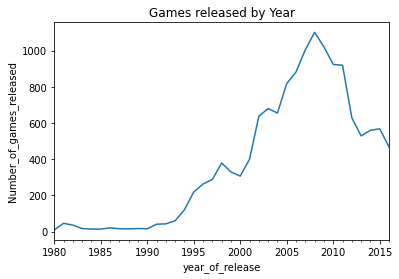

In [17]:
games_by_year.plot(title="Games released by Year",
                  ylabel= "Number_of_games_released")

Throughout the years, were going to filter the data by which platforms had the most total sales. In this case, we came to a conclusion that the PS2, XBOX360, and PS3 had the most sales by platform.

In [18]:
total_sales_platform = df.groupby("platform")["total_sales"].sum()

In [19]:
top_sales = total_sales_platform.sort_values(ascending=False).reset_index().head(3)
top_sales

,platform,total_sales
0,PS2,1191.93
1,X360,958.84
2,PS3,929.40


In [20]:
playstation_two_df = df[df["platform"] == "PS2"]

In [21]:
xbox360_df = df[df["platform"] == "X360"]

In [22]:
playstation_three_df = df[df["platform"] == "PS3"]

<AxesSubplot:title={'center':'PS2 Sales'}, xlabel='year_of_release', ylabel='Total Sales'>

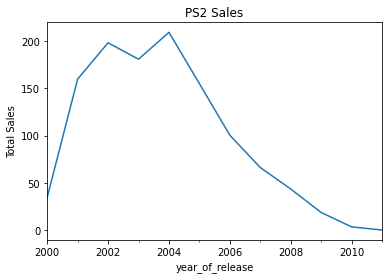

In [23]:
ps2_plot = playstation_two_df.groupby("year_of_release")["total_sales"].sum()
ps2_plot.plot(title="PS2 Sales",
             ylabel="Total Sales")

In [24]:
xbox360_plot = xbox360_df.groupby("year_of_release")["total_sales"].sum()

<AxesSubplot:title={'center':'Xbox 360 Total Sales'}, xlabel='year_of_release', ylabel='Total Sales'>

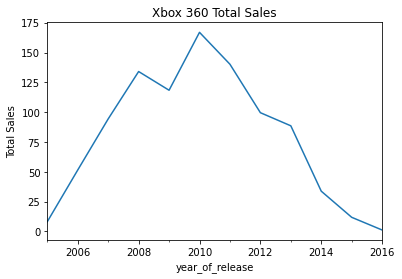

In [25]:
xbox360_plot.plot(title="Xbox 360 Total Sales",
                 ylabel="Total Sales")

<AxesSubplot:title={'center':'Plastation 3 Total Sales'}, xlabel='year_of_release', ylabel='Total Sales'>

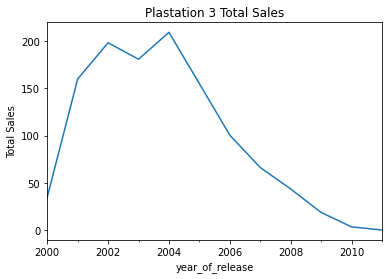

In [26]:
ps3_plot = playstation_three_df.groupby("year_of_release")["total_sales"].sum()
ps2_plot.plot(title="Plastation 3 Total Sales",
             ylabel="Total Sales")

In [27]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'])

In [28]:
df['year_of_release'].dt.year

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

(array([10, 15, 20, 25, 30, 35, 40, 45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

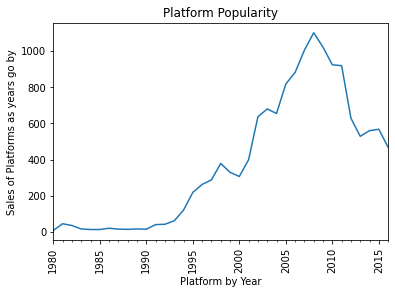

In [29]:
plot = df.groupby(["year_of_release"])["platform"].count()
plot.plot(xlabel= "Platform by Year",
         ylabel="Sales of Platforms as years go by",
         title="Platform Popularity")
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Platform Total Sales'}, xlabel='platform', ylabel='Total Sales'>

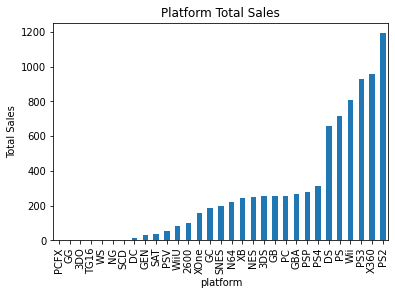

In [30]:
bar_graph = df.groupby("platform")["total_sales"].sum().sort_values()
bar_graph.plot(kind="bar",
              title="Platform Total Sales",
              ylabel = "Total Sales")

<AxesSubplot:title={'center':'Playstation_3 Sales throughout Years'}, xlabel='year_of_release', ylabel='Total_sales'>

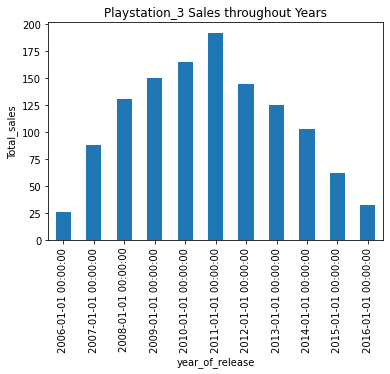

In [31]:
playstation_3 = df[df["platform"] == "PS3"].groupby("year_of_release")["total_sales"].count()
playstation_3.plot(kind="bar",
                  ylabel="Total_sales",
                  title="Playstation_3 Sales throughout Years")

playstation_3 = df[df["platform"] == "PS3"].groupby("year_of_release")["total_sales"].count()
playstation_3.plot(kind="bar",
                  ylabel="Total_sales",
                  title="Playstation_3 Sales throughout Years")


<AxesSubplot:title={'center':'PS2 Sales throughout Years'}, xlabel='year_of_release', ylabel='Total_sales'>

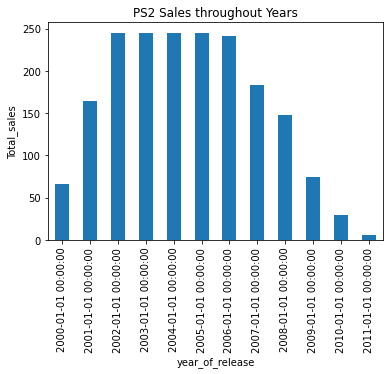

In [32]:
playstation_2 = df[df["platform"] == "PS2"].groupby("year_of_release")["total_sales"].count()
playstation_2.plot(kind="bar",
                  ylabel="Total_sales",
                  title="PS2 Sales throughout Years")



<AxesSubplot:title={'center':'X360 Sales throughout Years'}, xlabel='year_of_release', ylabel='Total_sales'>

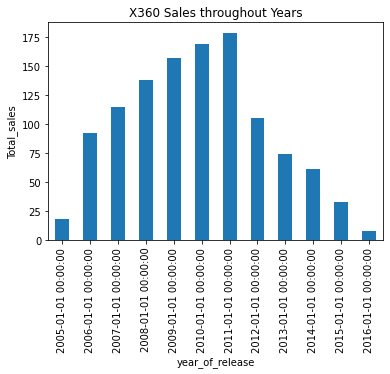

In [33]:
x360 = df[df["platform"] == "X360"].groupby("year_of_release")["total_sales"].count()
x360.plot(kind="bar",
                  ylabel="Total_sales",
                  title="X360 Sales throughout Years")


<AxesSubplot:title={'center':'Wii Sales throughout Years'}, xlabel='year_of_release', ylabel='Total_sales'>

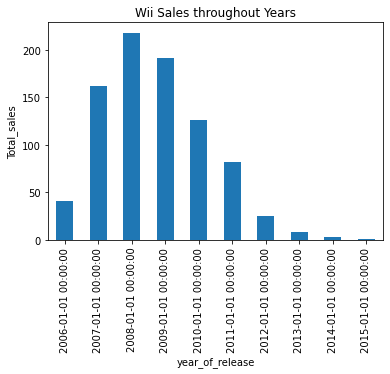

In [34]:
wii = df[df["platform"] == "Wii"].groupby("year_of_release")["total_sales"].count()
wii.plot(kind="bar",
                  ylabel="Total_sales",
                  title="Wii Sales throughout Years")



According to the Data, using the most recent platforms and the ones with the most sales, it generally takes from 4-6 years to reach their peak in sales and after that 6th year, the sales start going down until they fade.

In [35]:
recent_dataframe = df[(df["year_of_release"] == "2016") | (df["year_of_release"] == "2015") | (df["year_of_release"] == "2014") | (df["year_of_release"] == "2013") | (df["year_of_release"] == "2012")]


In [36]:
recent_dataframe

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [37]:


average_userscore = recent_dataframe["user_score"].mean()

average_userscore

recent_dataframe.loc[:, "user_score"] = recent_dataframe["user_score"].fillna(average_userscore)


recent_dataframe

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,6.63612,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,6.63612,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.30000,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,6.63612,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,6.63612,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,6.63612,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,6.63612,NaN,0.01


We took the specific time interval of 2012-2016 becase according to the data analysis, platforms reach their peak and start to fade between 4-6 years, so we took the 4 year window with the most recent years of our data.

<AxesSubplot:title={'center':'Platforms Sale Going into 2017'}, xlabel='platform', ylabel='Total_sales'>

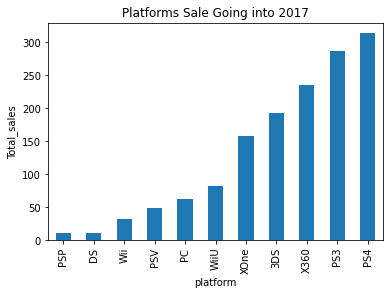

In [38]:
recent_platforms = recent_dataframe.groupby("platform")["total_sales"].sum().sort_values()

recent_platforms.plot(kind="bar",
                     title="Platforms Sale Going into 2017",
                     ylabel="Total_sales")

<AxesSubplot:title={'center':'Average Platforms Sale Going into 2017'}, xlabel='platform', ylabel='Total_sales'>

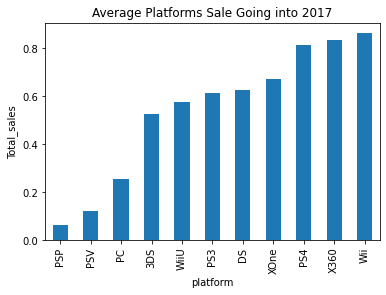

In [39]:
recent_platforms_average = recent_dataframe.groupby("platform")["total_sales"].mean().sort_values()

recent_platforms_average.plot(kind="bar",
                     title="Average Platforms Sale Going into 2017",
                     ylabel="Total_sales")

Taking the data for last 5 years, the consoles with the most sales after we summed the sales are the PS4, PS3 and X360. But if we look at the average sales from recent years,  you can see that the platforms that are on top of the sales charts are the PS4, X360, Wii and XOne based on the average sales of games in these platforms. The least sales according to the average of the recent data frame is the PSP, PSV, and PC.

Here we can observe how the sum of sales of each platform change in time:

<AxesSubplot:title={'center':'Wii Sales Change in Time'}, xlabel='year_of_release', ylabel='sales'>

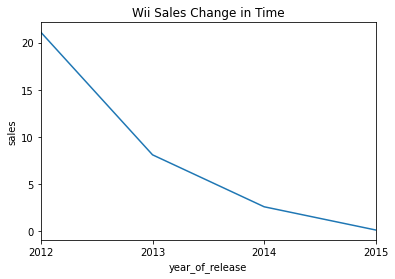

In [40]:
wii_over_time = recent_dataframe[recent_dataframe["platform"] == "Wii"]
wii_plot = wii_over_time.groupby("year_of_release")["total_sales"].sum()
wii_plot.plot(
title="Wii Sales Change in Time",
ylabel="sales")

<AxesSubplot:title={'center':'X360 Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

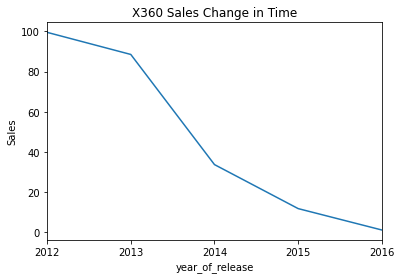

In [41]:
x360_over_time = recent_dataframe[recent_dataframe["platform"] == "X360"]
x360_plot = x360_over_time.groupby("year_of_release")["total_sales"].sum()
x360_plot.plot(
title="X360 Sales Change in Time",
ylabel="Sales")

<AxesSubplot:title={'center':'XOne Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

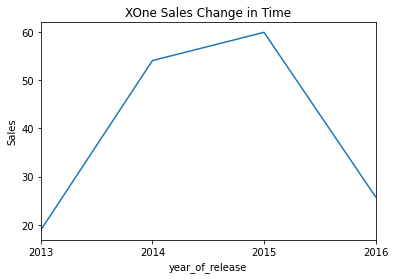

In [42]:
xone_over_time = recent_dataframe[recent_dataframe["platform"] == "XOne"]
xone_plot = xone_over_time.groupby("year_of_release")["total_sales"].sum()
xone_plot.plot(
title="XOne Sales Change in Time",
ylabel="Sales")

<AxesSubplot:title={'center':'PS4 Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

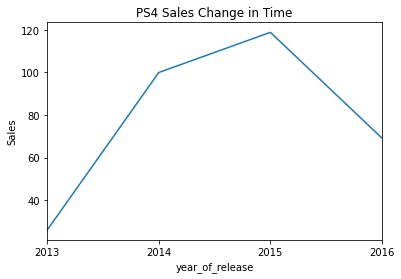

In [43]:
ps4_over_time = recent_dataframe[recent_dataframe["platform"] == "PS4"]
ps4_plot = ps4_over_time.groupby("year_of_release")["total_sales"].sum()
ps4_plot.plot(
title="PS4 Sales Change in Time",
ylabel="Sales")

<AxesSubplot:title={'center':'PS3 Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

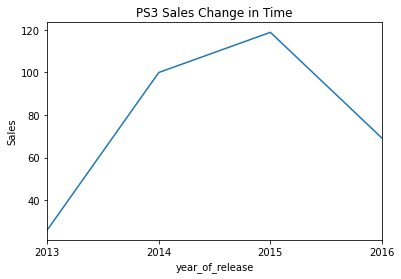

In [44]:
ps3_over_time = recent_dataframe[recent_dataframe["platform"] == "PS3"]
ps3_plot = ps4_over_time.groupby("year_of_release")["total_sales"].sum()
ps3_plot.plot(
title="PS3 Sales Change in Time",
ylabel="Sales")

<AxesSubplot:title={'center':'DS Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

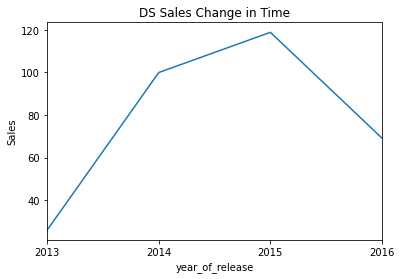

In [45]:
ds_over_time = recent_dataframe[recent_dataframe["platform"] == "DS"]
ds_plot = ps4_over_time.groupby("year_of_release")["total_sales"].sum()
ds_plot.plot(
title="DS Sales Change in Time",
ylabel="Sales")

<AxesSubplot:title={'center':'WiiU Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

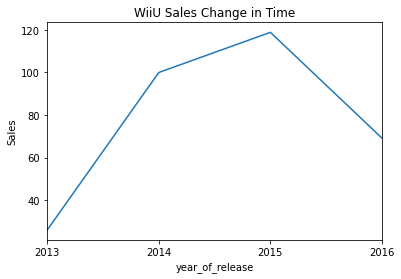

In [46]:
wiiu_over_time = recent_dataframe[recent_dataframe["platform"] == "WiiU"]
wiiu_plot = ps4_over_time.groupby("year_of_release")["total_sales"].sum()
wiiu_plot.plot(
title="WiiU Sales Change in Time",
ylabel="Sales")

<AxesSubplot:title={'center':'3DS Sales Change in Time'}, xlabel='year_of_release', ylabel='Sales'>

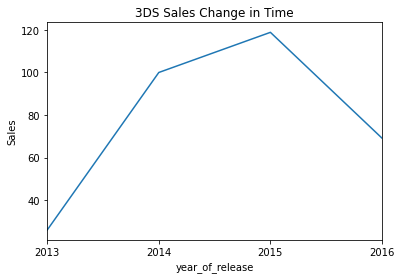

In [47]:
ds3_over_time = recent_dataframe[recent_dataframe["platform"] == "3DS"]
ds3_plot = ps4_over_time.groupby("year_of_release")["total_sales"].sum()
ds3_plot.plot(
title="3DS Sales Change in Time",
ylabel="Sales")

We can observe that the consoles that were released earlier like the Wii and the X360 sales are in a decline and the consoles like the PS4 and XOne have reached their peak at year 2015 and started to decline.

In [48]:
# Reviewer's code 10

recent_dataframe.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012-01-01,51.01,10.28,23.22,107.29,NaN,7.32,16.19,21.08,17.56,99.57,NaN
2013-01-01,56.32,0.97,12.38,113.24,25.99,3.14,10.59,8.11,21.65,88.57,18.96
2014-01-01,43.07,NaN,13.25,47.40,100.00,0.24,11.90,2.61,22.01,33.77,54.07
2015-01-01,27.21,NaN,8.49,16.30,118.86,0.12,5.95,0.15,16.27,11.87,59.92
2016-01-01,15.10,NaN,5.22,3.16,69.15,NaN,4.24,NaN,4.30,1.22,25.82


### Box Plots

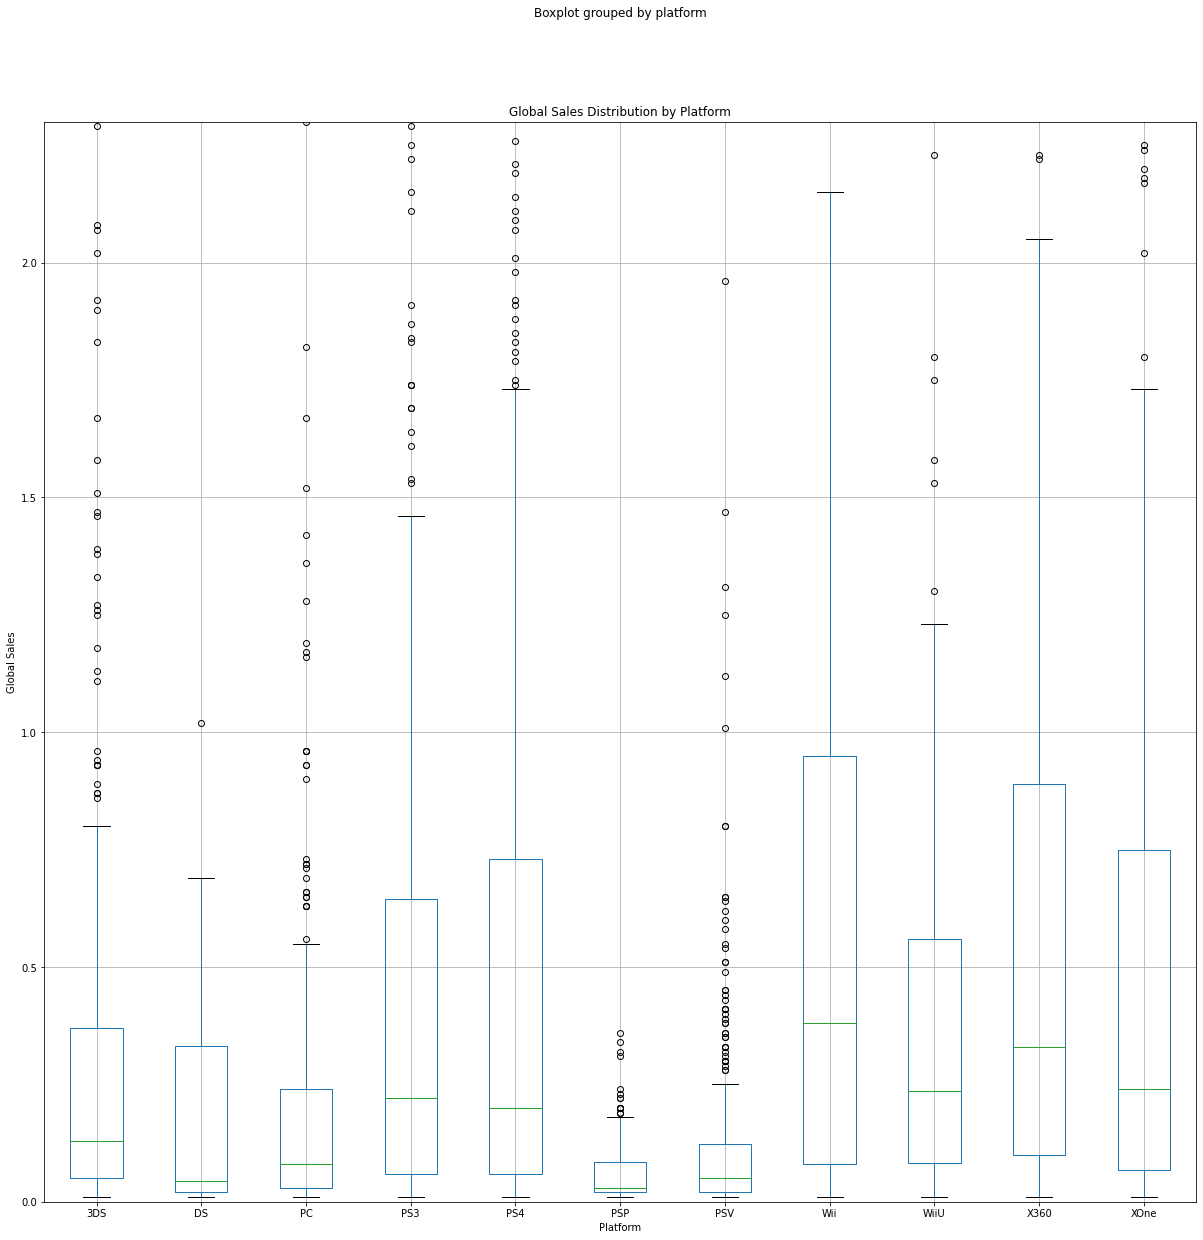

In [41]:
recent_dataframe.boxplot(column='total_sales', by='platform', figsize=(20, 20))
plt.xlabel('Platform')
plt.ylim(0,2.3)
plt.ylabel('Global Sales')
plt.title('Global Sales Distribution by Platform')
plt.grid(True)
plt.show()

Although the Wii is a platform that is fading, it has games with the highest sales in all of the platforms. Next would be the Xbox360 withe the second highest value and in third place is the XOne.

In [42]:
recent_dataframe[recent_dataframe["name"] == "Grand Theft Auto V"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014-01-01,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015-01-01,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


Outliers in these box plots tell you about data points that fall outside the expected range of the majority of the data. In this case it represents the games that had unusually high or unusually low amount of sales for that platform compared to the rest of the data for these platforms.

### Correlation



<AxesSubplot:title={'center':'Wii Sales Depending on User Scores'}, xlabel='user_score', ylabel='Wii_Sales'>

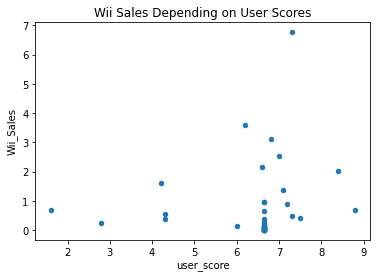

In [43]:
Wii = recent_dataframe[recent_dataframe["platform"] == "Wii" ]

Wii.plot(kind="scatter",
       x="user_score",
       y="total_sales",
       ylabel="Wii_Sales",
       title="Wii Sales Depending on User Scores")



<AxesSubplot:title={'center':'X360 Sales Depending on User Scores'}, xlabel='user_score', ylabel='X360_Sales'>

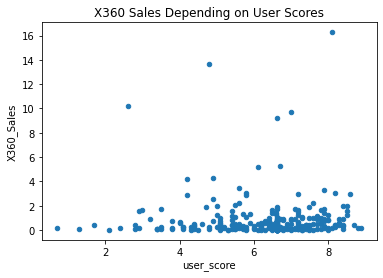

In [44]:
x360 = recent_dataframe[recent_dataframe["platform"] == "X360" ]

x360.plot(kind="scatter",
       x="user_score",
       y="total_sales",
       ylabel="X360_Sales",
       title="X360 Sales Depending on User Scores")


<AxesSubplot:title={'center':'XOne Sales Depending on User Scores'}, xlabel='user_score', ylabel='XOne_Sales'>

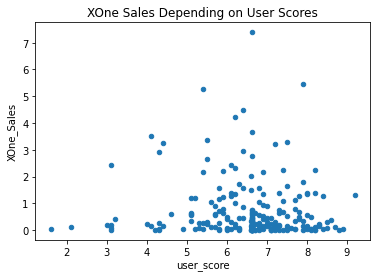

In [45]:
XOne = recent_dataframe[recent_dataframe["platform"] == "XOne" ]

XOne.plot(kind="scatter",
       x="user_score",
       y="total_sales",
       ylabel="XOne_Sales",
       title="XOne Sales Depending on User Scores")



In [46]:
correlation_critic = Wii['total_sales'].corr(Wii['critic_score'])
print("The correlation between Total Sales and Critic Score:")
print(correlation_critic)
print()
correlation_user = Wii['total_sales'].corr(Wii['user_score'])
print("The Correlation for Total Sales and User Score:")
print(correlation_user)


The correlation between Total Sales and Critic Score:
-0.4243413011077495

The Correlation for Total Sales and User Score:
0.13162801066624033


In [47]:
correlation_critic_X360 = x360['total_sales'].corr(x360['critic_score'])
print("The correlation between Total Sales and Critic Score:")
print(correlation_critic_X360)
print()
correlation_critic_X360_user = x360['total_sales'].corr(x360['user_score'])
print("The Correlation for Total Sales and User Score:")
print(correlation_critic_X360_user)

The correlation between Total Sales and Critic Score:
0.3605734888507335

The Correlation for Total Sales and User Score:
-0.0035642969990034713


In [48]:
correlation_critic_XOne = XOne['total_sales'].corr(XOne['critic_score'])
print("The correlation between Total Sales and Critic Score:")
print(correlation_critic_XOne)
print()
correlation_critic_XOne_user = XOne['total_sales'].corr(XOne['user_score'])
print("The Correlation for Total Sales and User Score:")
print(correlation_critic_XOne_user)

The correlation between Total Sales and Critic Score:
0.41215586820316974

The Correlation for Total Sales and User Score:
-0.06302166741717204


### Top game sales by Platform

In [49]:
recent_dataframe.groupby("name")["total_sales"].sum().sort_values(ascending=False).head(3)

name
Grand Theft Auto V            56.58
Call of Duty: Black Ops II    29.40
Call of Duty: Ghosts          27.39
Name: total_sales, dtype: float64

The Top 3 games sold across all the platforms in the recent Data Frame are:
Grand Theft Auto V
Call of Duty: Black Ops II
Call of Duty: Ghosts.
Below we are going to see how the sales went throughout all of the platforms available.



In [50]:
GTAV = recent_dataframe[recent_dataframe["name"] == "Grand Theft Auto V"]
GTAV

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014-01-01,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015-01-01,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


<AxesSubplot:title={'center':'GTAV Sales by Console'}, xlabel='platform', ylabel='Sales'>

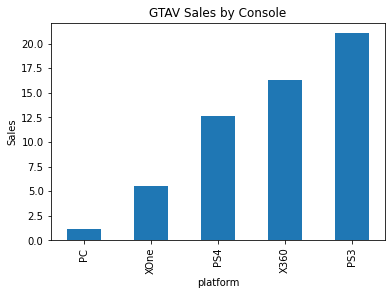

In [51]:
gta_plot = GTAV.groupby("platform")["total_sales"].sum().sort_values()
gta_plot.plot(kind="bar",
              title="GTAV Sales by Console",
              ylabel="Sales")

In [52]:
call_of_duty_boII = recent_dataframe[recent_dataframe["name"] == "Call of Duty: Black Ops II"]
call_of_duty_boII

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
1227,Call of Duty: Black Ops II,PC,2012-01-01,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M,1.52
4706,Call of Duty: Black Ops II,WiiU,2012-01-01,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M,0.41


<AxesSubplot:title={'center':'Call of Duty: Black Ops II Sales by Console'}, xlabel='platform', ylabel='Total_Sales'>

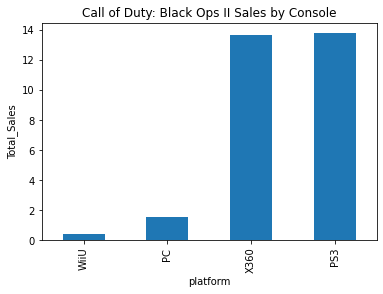

In [53]:
call_of_duty_boII_plot = call_of_duty_boII.groupby("platform")["total_sales"].sum().sort_values()
call_of_duty_boII_plot.plot(kind="bar",
              title="Call of Duty: Black Ops II Sales by Console",
              ylabel="Total_Sales")

In [54]:
cod_ghosts = recent_dataframe[recent_dataframe["name"] == "Call of Duty: Ghosts"]
cod_ghosts

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
60,Call of Duty: Ghosts,X360,2013-01-01,Shooter,6.73,2.56,0.04,0.91,73.0,2.60000,M,10.24
69,Call of Duty: Ghosts,PS3,2013-01-01,Shooter,4.10,3.63,0.38,1.25,71.0,2.60000,M,9.36
323,Call of Duty: Ghosts,PS4,2013-01-01,Shooter,1.78,1.43,0.05,0.57,78.0,3.70000,M,3.83
493,Call of Duty: Ghosts,XOne,2013-01-01,Shooter,1.88,0.77,0.00,0.27,78.0,4.30000,M,2.92
2916,Call of Duty: Ghosts,PC,2013-01-01,Shooter,0.23,0.41,0.00,0.05,NaN,6.63612,NaN,0.69
5348,Call of Duty: Ghosts,WiiU,2013-01-01,Shooter,0.22,0.09,0.01,0.03,69.0,3.40000,M,0.35


<AxesSubplot:title={'center':'Call of Duty: Ghosts Sales by Console'}, xlabel='platform', ylabel='Units_Sold'>

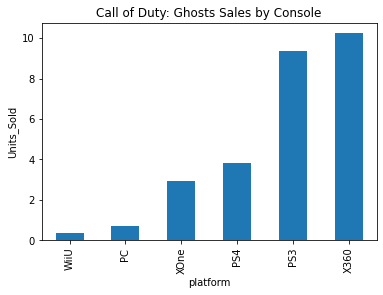

In [55]:
cod_ghosts_plot = cod_ghosts.groupby("platform")["total_sales"].sum().sort_values()
cod_ghosts_plot.plot(kind="bar",
              title="Call of Duty: Ghosts Sales by Console",
              ylabel="Units_Sold")

Two out of the three consoles displayed, the PS3 outsold the other two consoles with the top games available throughout multiple platforms.

### Most Profitable Genres

<AxesSubplot:title={'center':'Most Profitable Genres in Recent Years'}, xlabel='genre', ylabel='Sales'>

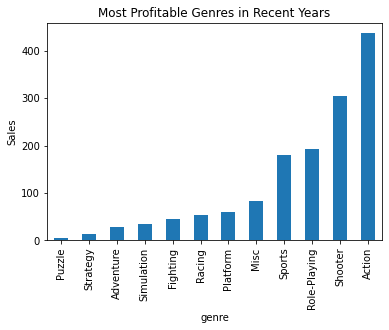

In [56]:
genre_sales = recent_dataframe.groupby("genre")["total_sales"].sum().sort_values()
genre_sales.plot(kind="bar",
                title="Most Profitable Genres in Recent Years",
                ylabel="Sales")

<AxesSubplot:title={'center':'Average sales by Genres in Recent Years'}, xlabel='genre', ylabel='Sales'>

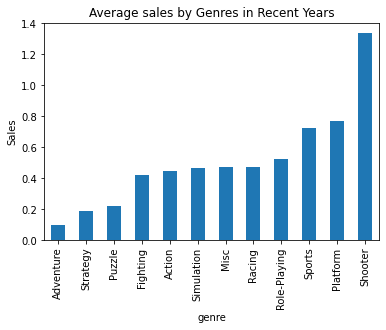

In [57]:
genre_sales_average = recent_dataframe.groupby("genre")["total_sales"].mean().sort_values()
genre_sales_average.plot(kind="bar",
                        title="Average sales by Genres in Recent Years",
                         ylabel="Sales")

<AxesSubplot:title={'center':'Median sales of all Genres'}, xlabel='genre', ylabel='Sales'>

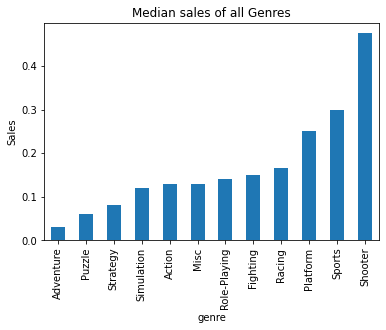

In [58]:
genre_sales_median = recent_dataframe.groupby("genre")["total_sales"].median().sort_values()
genre_sales_median.plot(kind="bar",
                       title="Median sales of all Genres",
                        ylabel="Sales")

The genre that has released the most games is the "Action" genre but the most profitable genre is the "Platform" genre. But if you look at the last bar chart, this is a bar chart using all of the info and you can see that the action genre is the one with the most sales because its the genre with the most games released.

<AxesSubplot:title={'center':'Top Sales by Genre'}, xlabel='genre', ylabel='Sales of Games'>

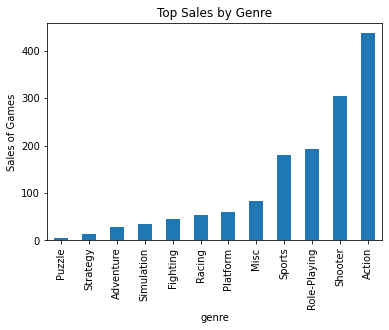

In [59]:
genre_sales.plot(kind="bar",
                ylabel="Sales of Games",
                title="Top Sales by Genre")

The most profitable genre is "Action" genre with 1495.77 in total sales and the least profitable is the "Strategy" genre with 160.99 in total sales.

### North America Region

#### Top 5 Platforms

In [60]:
na_sales_plot = recent_dataframe.groupby("platform")["na_sales"].sum().sort_values()
na_sales_plot

platform
PSP       0.05
DS        4.35
PSV      10.97
Wii      16.06
PC       19.12
WiiU     37.90
3DS      54.65
XOne     92.77
PS3     103.10
PS4     108.62
X360    139.16
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Top Platform Sales North America'}, xlabel='platform', ylabel='Sales'>

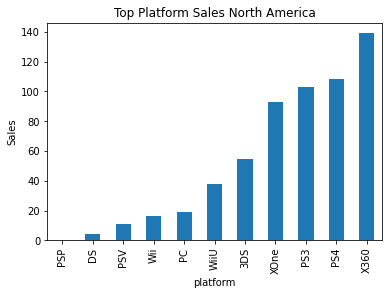

In [61]:
na_sales_plot.plot(kind="bar",
                  title="Top Platform Sales North America",
                  ylabel="Sales")

In [62]:


north_america_sales = recent_dataframe.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
na_genres = recent_dataframe.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
na_rating = recent_dataframe.groupby("rating")["na_sales"].sum().sort_values(ascending=False).head(5)



print(north_america_sales)
print()
print(na_genres)
print()
print(na_rating)


platform
X360    139.16
PS4     108.62
PS3     103.10
XOne     92.77
3DS      54.65
Name: na_sales, dtype: float64

genre
Action          176.39
Shooter         144.64
Sports           81.13
Role-Playing     64.00
Misc             36.90
Name: na_sales, dtype: float64

rating
M       231.47
E       112.92
E10+     73.29
T        65.80
Name: na_sales, dtype: float64


The top 5 platforms in the updated dataframe are the :X360, PS4, PS3, XOne, and 3DS.

The Top 5 genres in the updated dataframe are: Action, Shooter, Sports, Role-Playing and Misc.


#### Top 5 Genres

In [63]:
na_sales_platform = recent_dataframe.groupby("platform")["na_sales"].sum().sort_values()
na_sales_platform

platform
PSP       0.05
DS        4.35
PSV      10.97
Wii      16.06
PC       19.12
WiiU     37.90
3DS      54.65
XOne     92.77
PS3     103.10
PS4     108.62
X360    139.16
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'North America Most Popular Consoles'}, xlabel='platform', ylabel='Sales'>

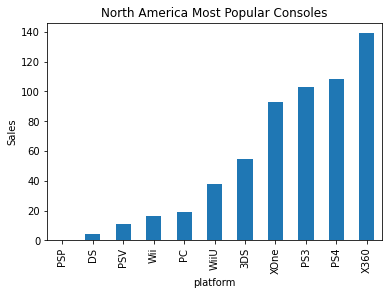

In [64]:
na_sales_platform.plot(kind="bar",
                      title="North America Most Popular Consoles",
                      ylabel="Sales")

In North America, the top 5 platforms are: Xbox 360, PS4, PS3, Xbox One, and 3DS.

In [65]:
na_sales_genre_plot = recent_dataframe.groupby("genre")["na_sales"].sum().sort_values()
na_sales_genre_plot

genre
Puzzle            1.06
Strategy          4.23
Simulation        7.75
Adventure         8.64
Racing           17.13
Fighting         19.73
Platform         25.15
Misc             36.90
Role-Playing     64.00
Sports           81.13
Shooter         144.64
Action          176.39
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Top Genre Sales North America'}, xlabel='genre', ylabel='Sales'>

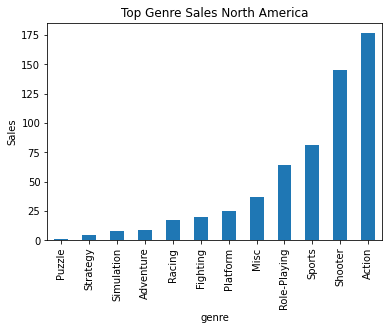

In [66]:
na_sales_genre_plot.plot(kind="bar",
                  title="Top Genre Sales North America",
                        ylabel="Sales")

In North America, the top 5 genres are: Action, Shooter, Sports, Role-Playing, and Misc.

### Europe Region

#### Top Europe Platforms

In [67]:
eu_sales_plot = recent_dataframe.groupby("platform")["eu_sales"].sum().sort_values()
eu_sales_plot

platform
PSP       0.35
DS        2.58
Wii      10.21
PSV      11.21
WiiU     24.97
PC       37.67
3DS      41.64
XOne     51.43
X360     74.02
PS3     106.26
PS4     141.09
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Top Europe Sales by Platform'}, xlabel='platform', ylabel='sales'>

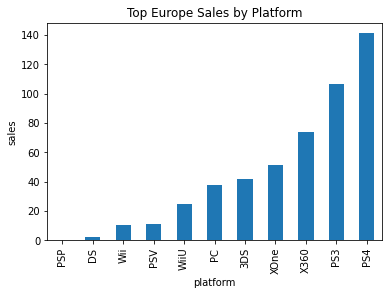

In [68]:
eu_sales_plot.plot(kind="bar",
                  title="Top Europe Sales by Platform",
                  ylabel="sales")

In Europe, the top 5 platforms are: PS4, PS3, Xbox360, Xbox One, and 3DS.

#### Top Europe Genres

In [69]:
eu_sales_genre_plot = recent_dataframe.groupby("genre")["eu_sales"].sum().sort_values()
eu_sales_genre_plot

genre
Puzzle            1.29
Strategy          5.17
Adventure         8.89
Fighting         10.77
Simulation       14.31
Platform         20.91
Misc             24.84
Racing           27.19
Role-Playing     48.53
Sports           68.69
Shooter         113.33
Action          157.51
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Top Europe Sales by Genre'}, xlabel='genre', ylabel='Sales'>

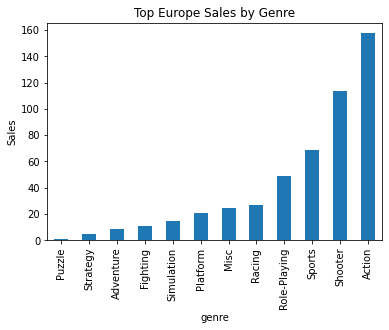

In [70]:
eu_sales_genre_plot.plot(kind="bar",
                  title="Top Europe Sales by Genre",
                        ylabel="Sales")

In Europe, the top 5 platforms are: Action, Shooter, Sports, Role-Playing, and Racing.

In [71]:
europe_top_sales = recent_dataframe.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
europe_genres = recent_dataframe.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
europe_rating = recent_dataframe.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).head(5)


print(europe_top_sales)
print()
print(europe_genres)
print()
print(europe_rating)


platform
PS4     141.09
PS3     106.26
X360     74.02
XOne     51.43
3DS      41.64
Name: eu_sales, dtype: float64

genre
Action          157.51
Shooter         113.33
Sports           68.69
Role-Playing     48.53
Racing           27.19
Name: eu_sales, dtype: float64

rating
M       193.94
E       110.95
T        52.82
E10+     52.48
Name: eu_sales, dtype: float64


In Europe, the top genre sold is the "action" genre. And, the top platform sold is the PS4.

### Japan Region

#### Top Japan Sales by Platform

In [72]:
jp_sales_plot = recent_dataframe.groupby("platform")["jp_sales"].sum().sort_values()
jp_sales_plot

platform
PC       0.00
XOne     0.34
X360     1.56
Wii      3.33
DS       3.72
PSP     10.29
WiiU    13.01
PS4     15.96
PSV     20.93
PS3     34.92
3DS     87.68
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Top Japan Sales by Platform'}, xlabel='platform', ylabel='Sales'>

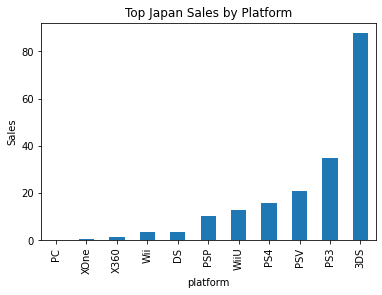

In [73]:
jp_sales_plot.plot(kind="bar",
                  title="Top Japan Sales by Platform",
                  ylabel="Sales")

In Japan, the top 5 platforms are: 3DS, PS3, PSV, PS4, and WiiU

#### Top Japan Sales by Genre

In [74]:
jp_sales_genre_plot = recent_dataframe.groupby("genre")["jp_sales"].sum().sort_values()
jp_sales_genre_plot

genre
Puzzle           2.14
Racing           2.47
Strategy         2.88
Sports           7.77
Adventure        8.24
Platform         8.63
Shooter          9.22
Fighting         9.41
Simulation      10.35
Misc            12.86
Action          52.33
Role-Playing    65.44
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Top Japan Sales by Genre'}, xlabel='genre'>

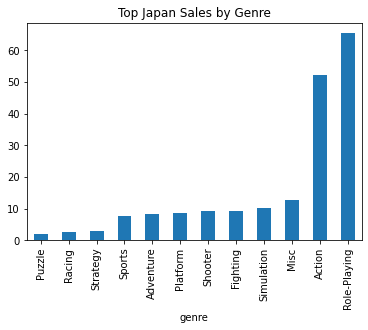

In [75]:
jp_sales_genre_plot.plot(kind="bar",
                  title="Top Japan Sales by Genre")

In Japan, the top 5 genres are: Role-Playing, Action, Misc, Simulation, and Fighting.

In [76]:

japan_sales = recent_dataframe.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(3)
jp_genres = recent_dataframe.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(3)
jp_rating = recent_dataframe.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).head(3)


print(japan_sales)
print()
print(jp_genres)
print()
print(jp_rating)

platform
3DS    87.68
PS3    34.92
PSV    20.93
Name: jp_sales, dtype: float64

genre
Role-Playing    65.44
Action          52.33
Misc            12.86
Name: jp_sales, dtype: float64

rating
E    28.09
T    25.55
M    21.20
Name: jp_sales, dtype: float64


### Does ESRB Rating affect sales in individual regions?

In [77]:
na_rating = recent_dataframe.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
na_rating

rating
M       231.47
E       112.92
E10+     73.29
T        65.80
Name: na_sales, dtype: float64

In [78]:
eu_rating = recent_dataframe.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
eu_rating

rating
M       193.94
E       110.95
T        52.82
E10+     52.48
Name: eu_sales, dtype: float64

In [79]:
jp_rating = recent_dataframe.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
jp_rating

rating
E       28.09
T       25.55
M       21.20
E10+     8.06
Name: jp_sales, dtype: float64

Depending on the region you're in affects the sales of games depending on the ESRB rating. If you look at the information for North America and Europe, the Top rating with the most Sales is rated M for Mature. If you look at the information for Japan, the most popular rating is rated E for Everyone. 

## Testing the Hypothesis

### Average user ratings of the XBOX One and PC platforms are the same.

H0 The average user rating of the XBOX One and PC Platforms are not different

H1 The average user rating of the XBOX One and PC platforms are different

In [80]:

xbox = recent_dataframe[recent_dataframe["platform"] == "XOne"]["user_score"]

pc = recent_dataframe[recent_dataframe["platform"] == "PC"]["user_score"]

alpha = 0.05

results = st.ttest_ind(xbox, pc, equal_var = False)
print(results.pvalue)

if results.pvalue >= alpha:
    print("Cannot reject the H0")
else:
    print("Reject the HO")

0.4936088750795473
Cannot reject the H0


### Average user rating for the Action and Sports Genres are different.


H0 The average user rating of Action and Sports genres are not different

H1 The average user rating of Action and Sports genres are different

In [81]:
action = recent_dataframe[recent_dataframe["genre"] == "Action"]["user_score"]

sports = recent_dataframe[recent_dataframe["genre"] == "Sports"]["user_score"]

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print(results.pvalue)

if results.pvalue >= alpha:
    print("Cannot reject the H0")
else:
    print("Reject the HO")

4.442890983364967e-19
Reject the HO


The null hypothesis or H0: 
Represents the "no effect" or "default" scenario.
Assumes there's no statistically significant difference between the groups being compared, or no relationship between the variables.

The alternative Hypothesis or the H1: Represents the opposite of the null hypothesis.
States the expected effect or relationship you're trying to investigate.

#### The significance Level of 0.05

0.05 means we accept a 5% chance of making a Type I error. This provides a balance between:
Minimizing false positives: A lower alpha reduces the risk of mistaking random chance for a real effect.
Avoiding false negatives: A higher alpha increases the risk of missing a genuine effect, especially if the effect size is small.

## Conclusion

In Conclusion to our data analysis, we came to a conclusion that the sales of certain platforms and certain genres and platforms is based off the region where the game is being sold. The ESRP rating also affects the sales in individual regions. 

As you can see with the Data above, In Europe The top platform is the PS4, the most sold genre is the Action genre While looking at the data for North America, the most popular console is the Xbox 360 and the most sold genre is the "Action" genre. Lastly, looking at the information for Japan, the most sold console is the 3DS and the most popular genre is the "Role-playing" genre. We also came to a conclusion that a platform reaches its peak from 4-6 years and starts to fade after that. In North America and Europe, the most popular rating is games that are rated M for Mature, while in Japan the most popular ratinf is rating E for Everyone. 